In [6]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

In [7]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [20]:
data_set = pd.read_csv("output.csv", index_col=0)

In [29]:
reducer = umap.UMAP(n_neighbors=500)
embedding = reducer.fit_transform(data_set)
clrmap = plt.cm.hsv

db = DBSCAN(eps=1, min_samples=10).fit(embedding)
labels = db.labels_
unique_labels = set(labels)
colors = [clrmap(each) for each in np.linspace(0.05, 0.85, len(unique_labels))]
print("Number of clusters: " + str(len(unique_labels)))

Number of clusters: 15


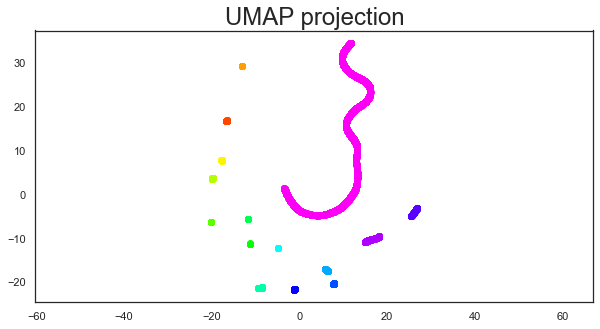

In [30]:
for i in range(len(labels)):
    col = colors[labels[i]]
    plt.scatter(embedding[i][0], embedding[i][1], color=tuple(col))
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
plt.show()

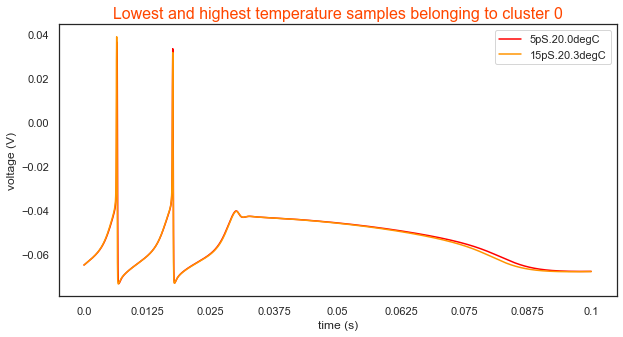

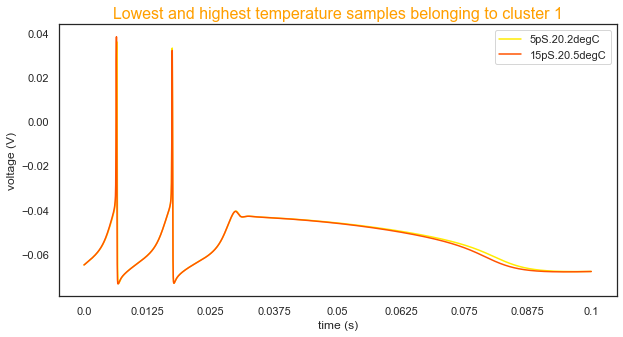

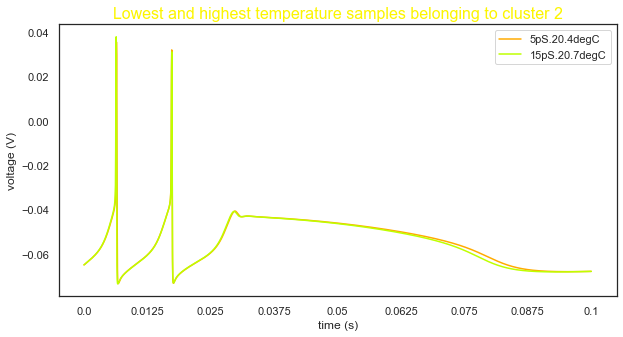

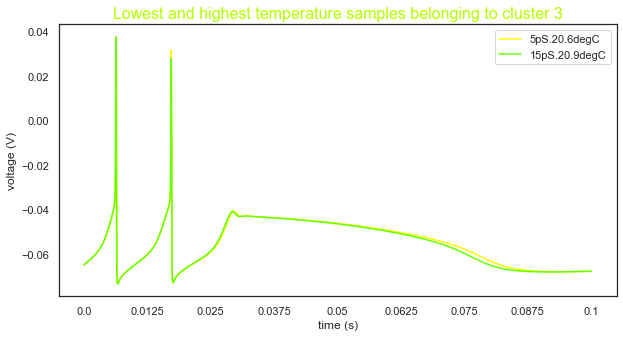

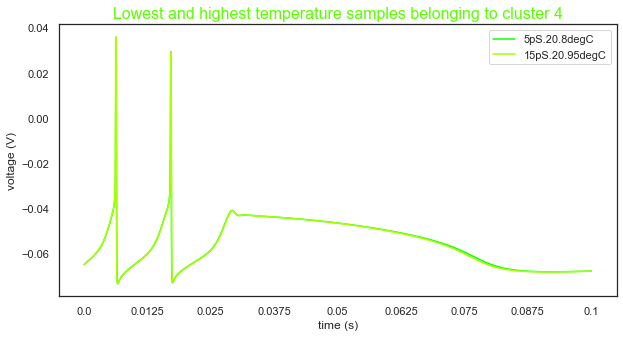

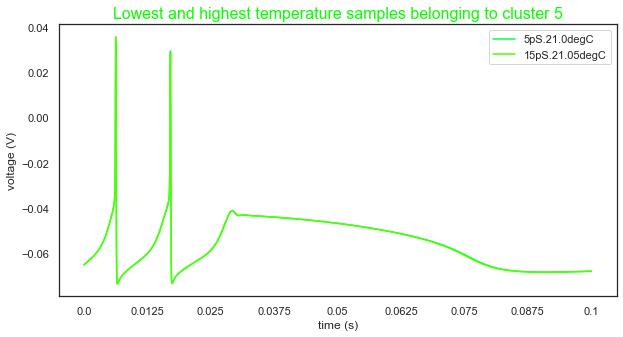

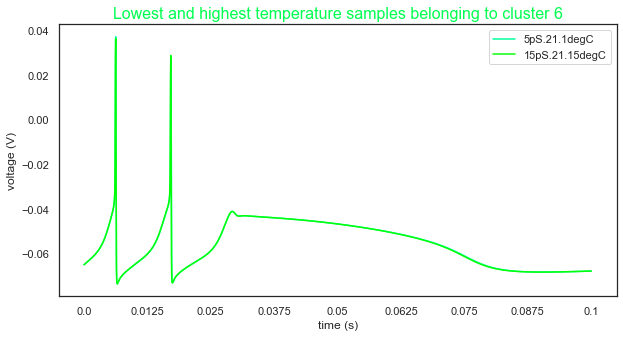

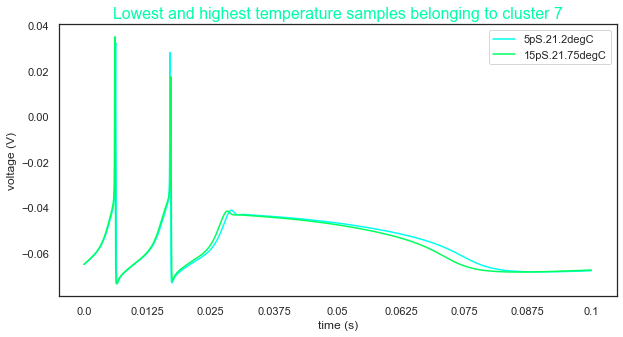

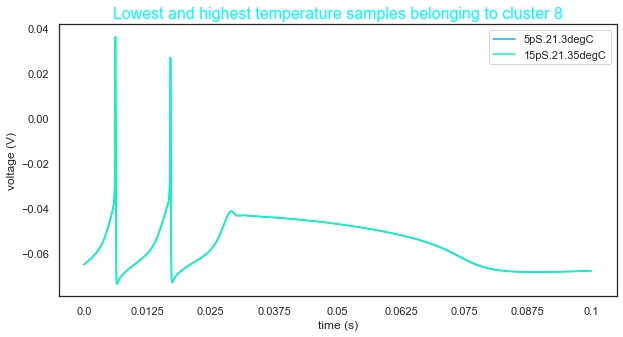

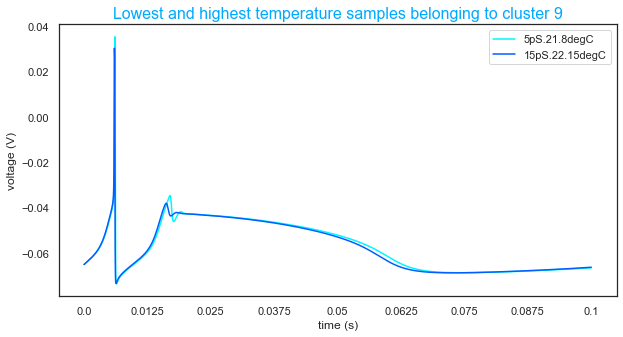

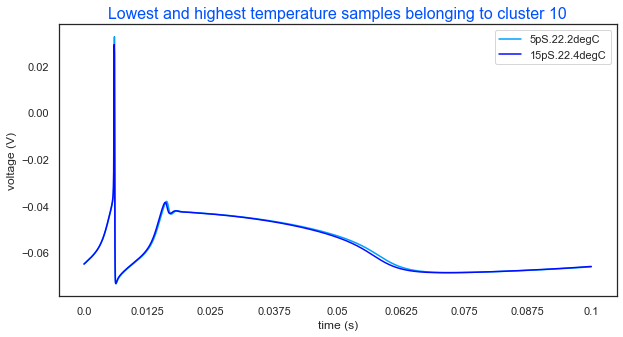

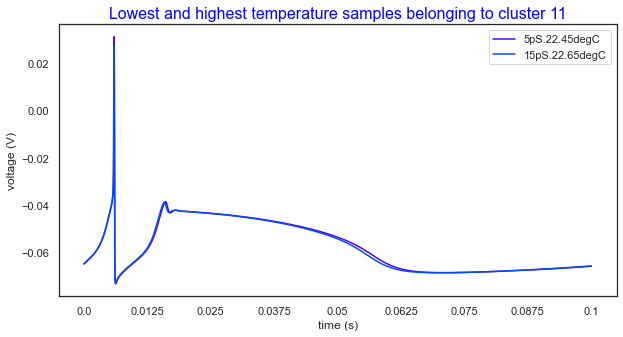

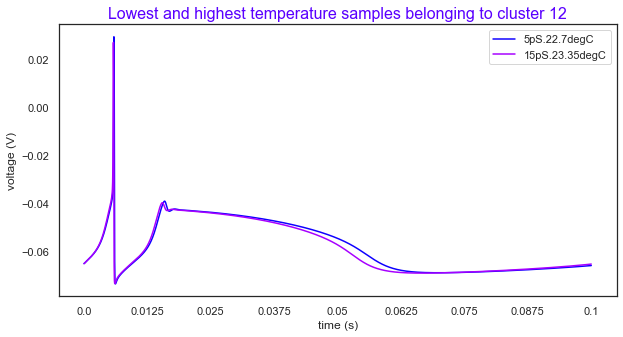

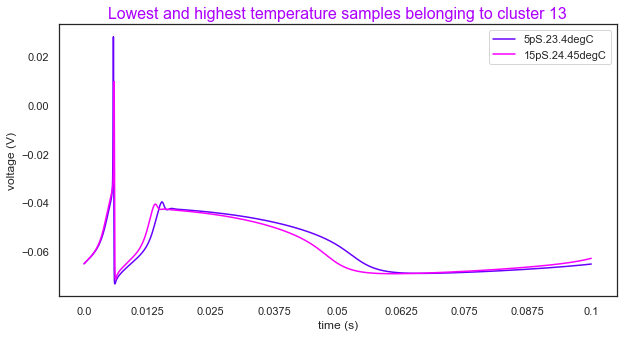

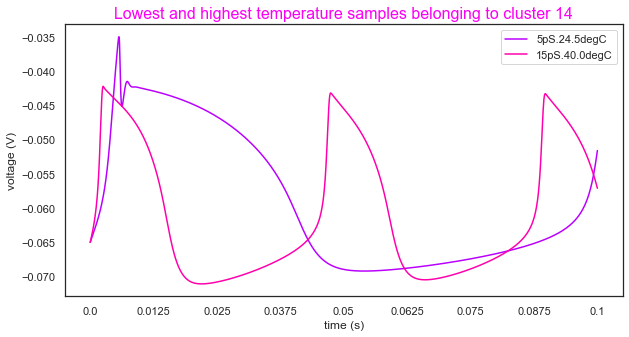

In [31]:
%matplotlib inline
first = []
last = []

for cluster_label in unique_labels:
    for i in range(len(labels)):
        if labels[i] == cluster_label:
            first.append(data_set.iloc[i].name)
            break
    for i in range(len(labels)-1, -1, -1):
        if labels[i] == cluster_label:
            last.append(data_set.iloc[i].name)
            break
            
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['axes.titlesize'] = 16
#plt.rc('font', size=22)

data_setT = pd.DataFrame.transpose(data_set)
colors_low = [clrmap(each-0.05) for each in np.linspace(0.05, 0.85, len(unique_labels))]
colors_high = [clrmap(each+0.05) for each in np.linspace(0.05, 0.85, len(unique_labels))]

for cluster_label in [12, 13]:
    col = colors[cluster_label]
    col_low = colors_low[cluster_label]
    col_high = colors_high[cluster_label]
    data_setT[[first[cluster_label], last[cluster_label]]].plot(color={tuple(col_low),tuple(col_high)})  
    plt.xlabel('time (s)')
    plt.ylabel('voltage (V)')
    plt.title('Lowest and highest temperature samples belonging to cluster '+str(cluster_label), color=tuple(col))
plt.show()

In [32]:
for cluster_label in unique_labels:
    keys_in_cluster = []
    for i in range(len(labels)):
        if labels[i] == cluster_label:
            keys_in_cluster.append(data_set.iloc[i].name)
    print(keys_in_cluster)

['5pS.20.0degC', '5pS.20.05degC', '5pS.20.1degC', '5pS.20.15degC', '5pS.20.3degC', '6pS.20.0degC', '6pS.20.05degC', '6pS.20.1degC', '6pS.20.15degC', '6pS.20.3degC', '7pS.20.0degC', '7pS.20.05degC', '7pS.20.1degC', '7pS.20.15degC', '7pS.20.3degC', '8pS.20.0degC', '8pS.20.05degC', '8pS.20.1degC', '8pS.20.15degC', '8pS.20.3degC', '9pS.20.0degC', '9pS.20.05degC', '9pS.20.1degC', '9pS.20.15degC', '9pS.20.3degC', '10pS.20.0degC', '10pS.20.05degC', '10pS.20.1degC', '10pS.20.15degC', '10pS.20.3degC', '11pS.20.0degC', '11pS.20.05degC', '11pS.20.1degC', '11pS.20.15degC', '11pS.20.3degC', '12pS.20.0degC', '12pS.20.05degC', '12pS.20.1degC', '12pS.20.15degC', '12pS.20.3degC', '13pS.20.0degC', '13pS.20.05degC', '13pS.20.1degC', '13pS.20.15degC', '13pS.20.3degC', '14pS.20.0degC', '14pS.20.05degC', '14pS.20.1degC', '14pS.20.15degC', '14pS.20.3degC', '15pS.20.0degC', '15pS.20.05degC', '15pS.20.1degC', '15pS.20.15degC', '15pS.20.3degC']
['5pS.20.2degC', '5pS.20.25degC', '5pS.20.35degC', '5pS.20.5degC', 

['5pS.22.7degC', '5pS.22.75degC', '5pS.22.8degC', '5pS.22.85degC', '5pS.22.9degC', '5pS.22.95degC', '5pS.23.0degC', '5pS.23.05degC', '5pS.23.1degC', '5pS.23.15degC', '5pS.23.2degC', '5pS.23.25degC', '5pS.23.3degC', '5pS.23.35degC', '6pS.22.7degC', '6pS.22.75degC', '6pS.22.8degC', '6pS.22.85degC', '6pS.22.9degC', '6pS.22.95degC', '6pS.23.0degC', '6pS.23.05degC', '6pS.23.1degC', '6pS.23.15degC', '6pS.23.2degC', '6pS.23.25degC', '6pS.23.3degC', '6pS.23.35degC', '7pS.22.7degC', '7pS.22.75degC', '7pS.22.8degC', '7pS.22.85degC', '7pS.22.9degC', '7pS.22.95degC', '7pS.23.0degC', '7pS.23.05degC', '7pS.23.1degC', '7pS.23.15degC', '7pS.23.2degC', '7pS.23.25degC', '7pS.23.3degC', '7pS.23.35degC', '8pS.22.7degC', '8pS.22.75degC', '8pS.22.8degC', '8pS.22.85degC', '8pS.22.9degC', '8pS.22.95degC', '8pS.23.0degC', '8pS.23.05degC', '8pS.23.1degC', '8pS.23.15degC', '8pS.23.2degC', '8pS.23.25degC', '8pS.23.3degC', '8pS.23.35degC', '9pS.22.7degC', '9pS.22.75degC', '9pS.22.8degC', '9pS.22.85degC', '9pS.22.9